In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)


In [ ]:
# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load dataset
df = pd.read_csv("//content//ahmed_chinn_data.csv")  # Change to your dataset

# Display first 5 rows
print(df.head())

      date  REC  GS10  GS3M      FCI  SPREAD10_3FOR
0  1986M01    0  9.19  7.30 -0.34584            NaN
1  1986M02    0  8.70  7.29 -0.35394            NaN
2  1986M03    0  7.78  6.76 -0.31862            NaN
3  1986M04    0  7.30  6.24 -0.37996            NaN
4  1986M05    0  7.71  6.33 -0.50496            NaN


# ---- STEP 1: Data Preprocessing ----
# Handle missing values (Fill with mean for numerical, mode for categorical)

In [ ]:
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical variables (if any)
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Splitting dataset into Features (X) and Target (y)
X = df.drop(columns=['REC'])  # Replace 'target_column' with actual target column name
y = df['REC']

# Standardizing numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training Decision Tree...
----------------------------------------
Epoch 1: Accuracy = 0.9775
Epoch 2: Accuracy = 0.9775
Epoch 3: Accuracy = 0.9775
Epoch 4: Accuracy = 0.9775
Epoch 5: Accuracy = 0.9888
Epoch 6: Accuracy = 0.9888
Epoch 7: Accuracy = 0.9775
Epoch 8: Accuracy = 0.9888
Epoch 9: Accuracy = 0.9888
Epoch 10: Accuracy = 0.9775

Decision Tree - Final Metrics after 10 epochs:
Average Accuracy: 0.9820
Average Precision: 1.0000
Average Recall: 0.8000
Average F1-score: 0.8876
Average ROC-AUC Score: 0.9000


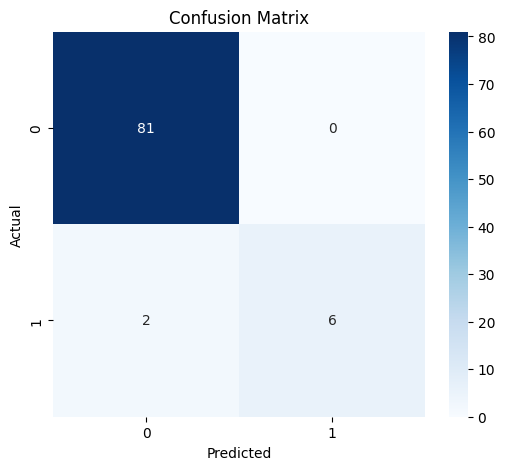

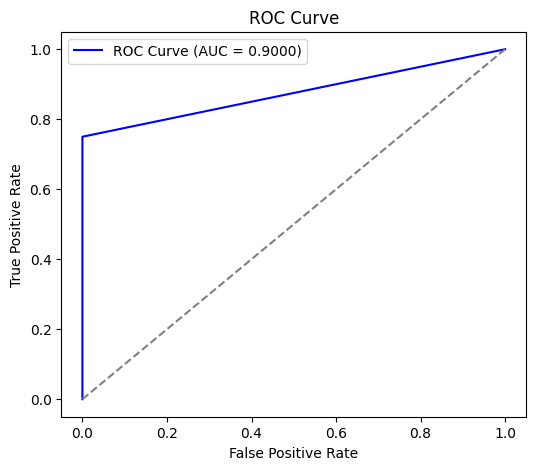

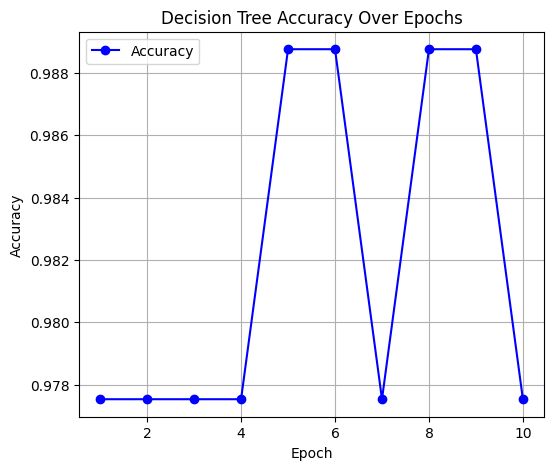

In [ ]:
# Define the Decision Tree model
model = DecisionTreeClassifier()

# Store performance metrics
epochs = 10
accuracies = []
all_conf_matrices = []
all_precisions = []
all_recalls = []
all_f1s = []
all_roc_aucs = []

print(f"\nTraining Decision Tree...\n" + "-"*40)
for epoch in range(epochs):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_prob)

    all_conf_matrices.append(conf_matrix)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1s.append(f1)
    all_roc_aucs.append(roc_auc)

    print(f"Epoch {epoch+1}: Accuracy = {acc:.4f}")

# Compute average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(all_precisions)
avg_recall = np.mean(all_recalls)
avg_f1 = np.mean(all_f1s)
avg_roc_auc = np.mean(all_roc_aucs)

print(f"\nDecision Tree - Final Metrics after {epochs} epochs:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")
print(f"Average ROC-AUC Score: {avg_roc_auc:.4f}")

# Visualization - Confusion Matrix (last epoch)
plt.figure(figsize=(6, 5))
sns.heatmap(all_conf_matrices[-1], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization - ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {avg_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Visualization - Accuracy over Epochs
plt.figure(figsize=(6, 5))
plt.plot(range(1, epochs+1), accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()



Training Random Forest...
----------------------------------------
Epoch 1: Accuracy = 0.9775
Epoch 2: Accuracy = 0.9775
Epoch 3: Accuracy = 0.9888
Epoch 4: Accuracy = 0.9663
Epoch 5: Accuracy = 0.9663
Epoch 6: Accuracy = 0.9663
Epoch 7: Accuracy = 0.9551
Epoch 8: Accuracy = 0.9663
Epoch 9: Accuracy = 0.9663
Epoch 10: Accuracy = 0.9775

Random Forest - Final Metrics after 10 epochs:
Average Accuracy: 0.9708
Average Precision: 1.0000
Average Recall: 0.6750
Average F1-score: 0.8018
Average ROC-AUC Score: 0.9988


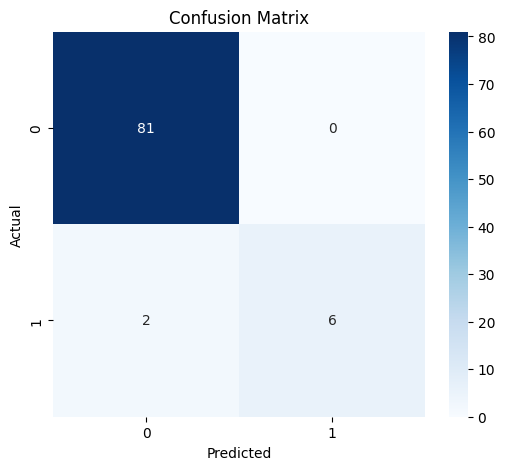

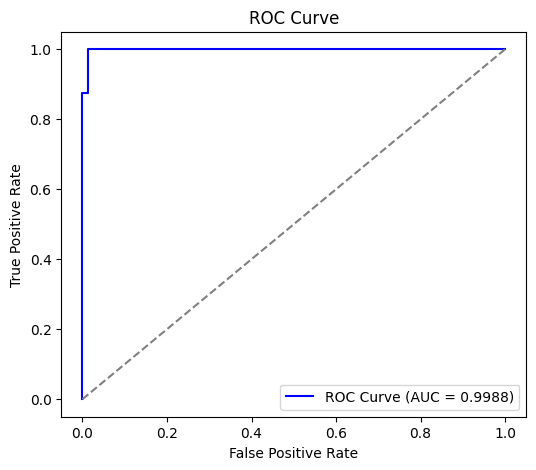

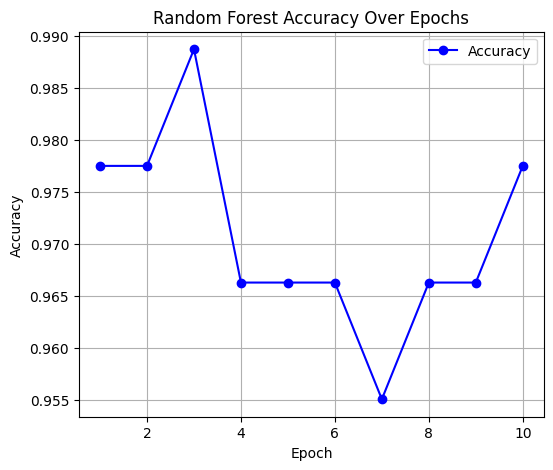

In [ ]:
# Define the Random Forest model
model = RandomForestClassifier(n_estimators=100)

# Store performance metrics
epochs = 10
accuracies = []
all_conf_matrices = []
all_precisions = []
all_recalls = []
all_f1s = []
all_roc_aucs = []

print(f"\nTraining Random Forest...\n" + "-"*40)
for epoch in range(epochs):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_prob)

    all_conf_matrices.append(conf_matrix)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1s.append(f1)
    all_roc_aucs.append(roc_auc)

    print(f"Epoch {epoch+1}: Accuracy = {acc:.4f}")

# Compute average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(all_precisions)
avg_recall = np.mean(all_recalls)
avg_f1 = np.mean(all_f1s)
avg_roc_auc = np.mean(all_roc_aucs)

print(f"\nRandom Forest - Final Metrics after {epochs} epochs:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")
print(f"Average ROC-AUC Score: {avg_roc_auc:.4f}")

# Visualization - Confusion Matrix (last epoch)
plt.figure(figsize=(6, 5))
sns.heatmap(all_conf_matrices[-1], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization - ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {avg_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Visualization - Accuracy over Epochs
plt.figure(figsize=(6, 5))
plt.plot(range(1, epochs+1), accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
